In [6]:
import bokeh

0.10.0



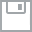
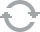
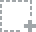
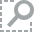
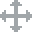
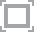
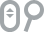
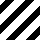
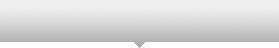
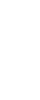
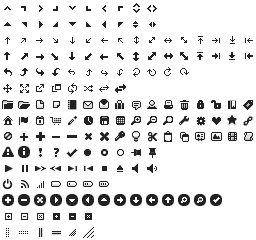
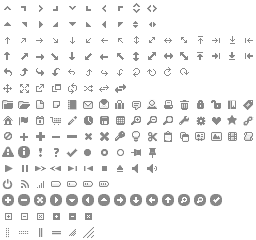
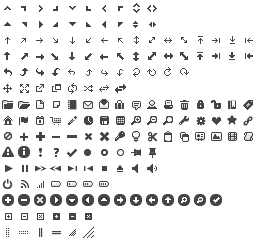
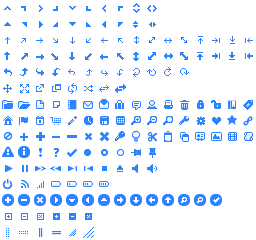
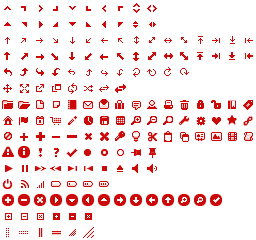
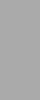
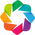
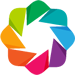

In [7]:
print bokeh.__version__

from bokeh import io
io.output_notebook()

# Basic heatmap

First, we build a basic heatmap, from the bokeh documentation.

In [8]:
from collections import OrderedDict

import numpy as np

from bokeh.plotting import ColumnDataSource, figure, show
from bokeh.models import HoverTool
from bokeh.sampledata.unemployment1948 import data

# Read in the data with pandas. Convert the year column to string
data['Year'] = [str(x) for x in data['Year']]
years = list(data['Year'])
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
data = data.set_index('Year')

# this is the colormap from the original plot
colors = [
    "#75968f", "#a5bab7", "#c9d9d3", "#e2e2e2", "#dfccce",
    "#ddb7b1", "#cc7878", "#933b41", "#550b1d"
]

# Set up the data for plotting. We will need to have values for every
# pair of year/month names. Map the rate to a color.
month = []
year = []
color = []
rate = []
for y in years:
    for m in months:
        month.append(m)
        year.append(y)
        monthly_rate = data[m][y]
        rate.append(monthly_rate)
        color.append(colors[min(int(monthly_rate)-2, 8)])

source = ColumnDataSource(
    data=dict(month=month, year=year, color=color, rate=rate)
)

TOOLS = "save,hover"
p = figure(title="US Unemployment (1948 - 2013)",
    x_range=years, y_range=list(reversed(months)),
    x_axis_location="below", plot_width=900, plot_height=400,
    toolbar_location="left", tools=TOOLS)

p.rect("year", "month", 1, 1, source=source,
    color="color", line_color=None)

p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "5pt"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = np.pi/2

hover = p.select(dict(type=HoverTool))
hover.tooltips = OrderedDict([
    ('date', '@month @year'),
    ('rate', '@rate'),
])

show(p)      # show the plot

## Format our dataset

Now, we attempt to build using example datasets.

In [9]:
import numpy as np

np.zeros(100)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [10]:
%%bash

echo "foo"

foo


In [11]:
import pandas as pd
import sys
import os

In [12]:
fn = os.path.join(os.path.abspath(os.curdir), "data", "24kx80.tsv")
assert os.path.exists(fn)

In [13]:
df = pd.read_csv(fn, sep="\t", header=8)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23747 entries, 0 to 23746
Data columns (total 86 columns):
Gene ID        23747 non-null object
Description    23747 non-null int64
Chromosome     23747 non-null object
Gene Start     23747 non-null int64
Gene End       23747 non-null int64
Strand         23747 non-null object
-1500:-1451    23747 non-null int64
-1450:-1401    23747 non-null int64
-1400:-1351    23747 non-null int64
-1350:-1301    23747 non-null int64
-1300:-1251    23747 non-null int64
-1250:-1201    23747 non-null int64
-1200:-1151    23747 non-null int64
-1150:-1101    23747 non-null int64
-1100:-1051    23747 non-null int64
-1050:-1001    23747 non-null int64
-1000:-951     23747 non-null int64
-950:-901      23747 non-null int64
-900:-851      23747 non-null int64
-850:-801      23747 non-null int64
-800:-751      23747 non-null int64
-750:-701      23747 non-null int64
-700:-651      23747 non-null int64
-650:-601      23747 non-null int64
-600:-551      23747 non

In [14]:
if len(df["Gene ID"].unique()) == df.shape[0]:
    print "Gene ID unique"

Gene ID unique


Look at these header rows to ensure we've got nothing fancy:

In [16]:
df.ix[:10, 0:10]

,Gene ID,Description,Chromosome,Gene Start,Gene End,Strand,-1500:-1451,-1450:-1401,-1400:-1351,-1350:-1301
0,MRSFEB2012_00001,3661579,chr1,3661479,3661679,minus,4,2,2,6
1,MRSFEB2012_00002,4350395,chr1,4350295,4350495,minus,2,4,6,5
2,MRSFEB2012_00003,4399322,chr1,4399222,4399422,minus,11,2,3,14
3,MRSFEB2012_00004,4486494,chr1,4486394,4486594,minus,11,6,6,1
4,MRSFEB2012_00005,4775768,chr1,4775668,4775868,minus,6,4,10,3
5,MRSFEB2012_00008,4797976,chr1,4797876,4798076,plus,6,1,4,10
6,MRSFEB2012_00009,4847775,chr1,4847675,4847875,plus,18,4,2,7
7,MRSFEB2012_00012,5009507,chr1,5009407,5009607,minus,8,0,4,4
8,MRSFEB2012_00013,5060366,chr1,5060266,5060466,minus,4,1,3,13
9,MRSFEB2012_00014,5073210,chr1,5073110,5073310,plus,0,0,0,0


In [42]:
complete = df.ix[:, 6:]
complete.head()
complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23747 entries, 0 to 23746
Data columns (total 80 columns):
-1500:-1451    23747 non-null int64
-1450:-1401    23747 non-null int64
-1400:-1351    23747 non-null int64
-1350:-1301    23747 non-null int64
-1300:-1251    23747 non-null int64
-1250:-1201    23747 non-null int64
-1200:-1151    23747 non-null int64
-1150:-1101    23747 non-null int64
-1100:-1051    23747 non-null int64
-1050:-1001    23747 non-null int64
-1000:-951     23747 non-null int64
-950:-901      23747 non-null int64
-900:-851      23747 non-null int64
-850:-801      23747 non-null int64
-800:-751      23747 non-null int64
-750:-701      23747 non-null int64
-700:-651      23747 non-null int64
-650:-601      23747 non-null int64
-600:-551      23747 non-null int64
-550:-501      23747 non-null int64
-500:-451      23747 non-null int64
-450:-401      23747 non-null int64
-400:-351      23747 non-null int64
-350:-301      23747 non-null int64
-300:-251      23747 non-nu

In [43]:
m=complete.as_matrix()
assert m.dtype == np.int64
import cPickle

In [44]:
%%timeit -n 10

mPickle = cPickle.dumps(m, protocol=2)

10 loops, best of 3: 16.2 ms per loop


In [45]:
mPickle = cPickle.dumps(m, protocol=2)

In [46]:
%%timeit -n 10

m2 = cPickle.loads(mPickle)

10 loops, best of 3: 5.6 ms per loop


In [47]:
m2 = cPickle.loads(mPickle)
m2.shape

(23747, 80)

In [48]:
%%timeit -n 10

imresize(m2, (250, m2.shape[1]), interp="bilinear")

10 loops, best of 3: 49.2 ms per loop


In [49]:
subset = df.ix[:1000, 6:]
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001 entries, 0 to 1000
Data columns (total 80 columns):
-1500:-1451    1001 non-null int64
-1450:-1401    1001 non-null int64
-1400:-1351    1001 non-null int64
-1350:-1301    1001 non-null int64
-1300:-1251    1001 non-null int64
-1250:-1201    1001 non-null int64
-1200:-1151    1001 non-null int64
-1150:-1101    1001 non-null int64
-1100:-1051    1001 non-null int64
-1050:-1001    1001 non-null int64
-1000:-951     1001 non-null int64
-950:-901      1001 non-null int64
-900:-851      1001 non-null int64
-850:-801      1001 non-null int64
-800:-751      1001 non-null int64
-750:-701      1001 non-null int64
-700:-651      1001 non-null int64
-650:-601      1001 non-null int64
-600:-551      1001 non-null int64
-550:-501      1001 non-null int64
-500:-451      1001 non-null int64
-450:-401      1001 non-null int64
-400:-351      1001 non-null int64
-350:-301      1001 non-null int64
-300:-251      1001 non-null int64
-250:-201      100

### Build simple matplotlib heatmap

In [50]:
%matplotlib inline

In [51]:
import seaborn as sns

/Users/shapiroaj4/.virtualenvs/genomics/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


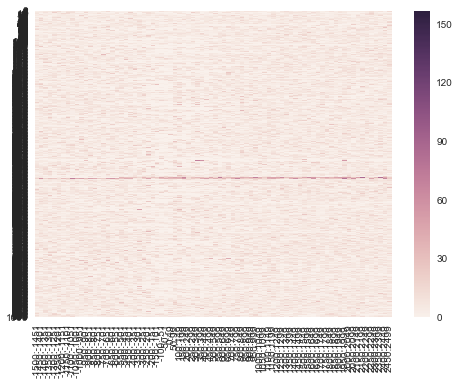

In [52]:
sns.heatmap(data=subset)

Observe that the simple conversion fails:

In [53]:
from bokeh import mpl
ax = sns.heatmap(data=subset)
show(mpl.to_bokeh())

ERROR:/Users/shapiroaj4/.virtualenvs/genomics/lib/python2.7/site-packages/bokeh/validation/check.pyc:W-1001 (NO_GLYPH_RENDERERS): Plot has no glyph renderers: Plot, ViewModel:Plot, ref _id: 0c01881c-18ca-4e39-869f-fd798ff67bcb
ERROR:/Users/shapiroaj4/.virtualenvs/genomics/lib/python2.7/site-packages/bokeh/validation/check.pyc:W-1001 (NO_GLYPH_RENDERERS): Plot has no glyph renderers: Plot, ViewModel:Plot, ref _id: c849648b-40bd-4f1f-8af7-5da21b5f41cd
ERROR:/Users/shapiroaj4/.virtualenvs/genomics/lib/python2.7/site-packages/bokeh/validation/check.pyc:W-1003 (MALFORMED_CATEGORY_LABEL): Category labels cannot contain colons: [range:x_range] [first_value: -1500:-1451] [renderer: Plot, ViewModel:Plot, ref _id: 0c01881c-18ca-4e39-869f-fd798ff67bcb]
ERROR:/Users/shapiroaj4/.virtualenvs/genomics/lib/python2.7/site-packages/bokeh/validation/check.pyc:W-1003 (MALFORMED_CATEGORY_LABEL): Category labels cannot contain colons: [range:x_range] [first_value: -1500:-1451] [renderer: Plot, ViewModel:Plo

There are two different ways to resize images in scipy:

In [54]:
from scipy.ndimage.interpolation import zoom

In [55]:
nparr = subset.as_matrix()

In [56]:
smaller = zoom(nparr, (250, 20))

The [imgresize method](http://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.imresize.html#scipy.misc.imresize) one requires `pillow` to be installed:

In [57]:
from scipy.misc import imresize

In [58]:
nparr.shape

(1001, 80)

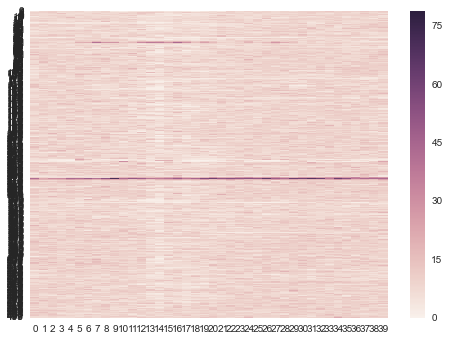

In [59]:
sns.heatmap(data=imresize(nparr, (500, 40), interp="bilinear"))

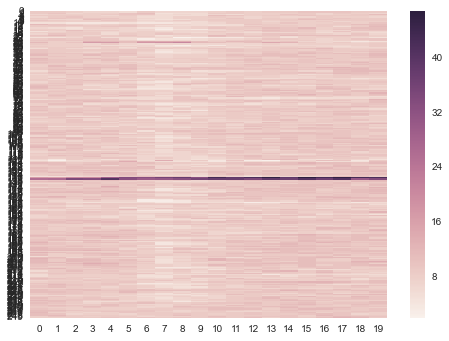

In [60]:
sns.heatmap(data=imresize(nparr, (250, 20), interp="bilinear"))

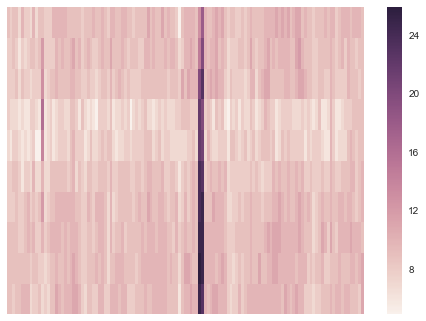

In [61]:
ds = imresize(nparr, (125, 10), interp="bilinear")
ds = ds.T
sns.heatmap(data=ds, yticklabels=[], xticklabels=[])

## Crafting a heatmap in bokeh

In [62]:
ds = imresize(nparr, (125, 10), interp="bilinear")
ds = ds.T
print ds.shape

(10, 125)


In [63]:
color_data = np.zeros(ds.shape, dtype=np.chararray)

In [64]:
# this is the colormap from the original plot
colors = [
    "#75968f", "#a5bab7", "#c9d9d3", "#e2e2e2", "#dfccce",
    "#ddb7b1", "#cc7878", "#933b41", "#550b1d"
]
cmin = ds.min()
cmax = ds.max()
datasets=["d" + str(i) for i in xrange(ds.shape[0])]
loc=["l" + str(i) for i in xrange(ds.shape[1])]

In [65]:
def getClosestColor(v):
    return colors[int(np.floor((float(v)-cmin)/(cmax-cmin)*(len(colors)-1)))]

In [66]:
rownames = []
colnames = []
for j,c in enumerate(ds):
    for i,r in enumerate(c):
        colnames.append(datasets[j])
        rownames.append(loc[i])
        color_data[j, i] = getClosestColor(r)        

In [67]:
source = ColumnDataSource( 
    data=dict(
        loc=rownames,
        datasets=colnames,
        colors=list(color_data.ravel()), 
        val=list(ds.ravel())))

In [73]:
source.data

{'height': [], 'width': [], 'x': [], 'y': []}

In [68]:
print len(datasets)
print len(loc)
print color_data.ravel().shape
print ds.ravel().shape

10
125
(1250,)
(1250,)


In [70]:
from bokeh.models.callbacks import CustomJS

TOOLS = "reset,box_zoom,save,hover"
p = figure(title=None,
    x_range=loc, 
    y_range=list(reversed(datasets)),
    x_axis_location="below", 
    plot_width=900, 
    plot_height=400,
    toolbar_location="left", tools=TOOLS)

p.rect("loc", "datasets", 1, 1, source=source, color="colors")

p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "0.5em"
p.axis.major_label_standoff = 3
p.xaxis.major_label_orientation = np.pi/4

hover = p.select(dict(type=HoverTool))
hover.tooltips = OrderedDict([
    ('Dataset', '@datasets'),
    ('Value', '@val'),
])


jscode = """
var data = source.get('data');
var start = range.get('start');
var end = range.get('end');
data['%s'] = [start + (end - start) / 2];
data['%s'] = [end - start];
source.trigger('change');
"""

p.x_range.callback = CustomJS(
        args=dict(source=source, range=p.x_range), code=jscode % ('x', 'width'))
p.y_range.callback = CustomJS(
        args=dict(source=source, range=p.y_range), code=jscode % ('y', 'height'))

show(p)

In [71]:
import numpy as np

from bokeh.plotting import figure, show, hplot
from bokeh.models import ColumnDataSource, CustomJS, Rect

N = 4000

x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = ["#%02x%02x%02x" % (r, g, 150) for r, g in zip(np.floor(50+2*x), np.floor(30+2*y))]

source = ColumnDataSource({'x': [], 'y': [], 'width': [], 'height': []})

jscode="""
        var data = source.get('data');
        var start = range.get('start');
        var end = range.get('end');
        data['%s'] = [start + (end - start) / 2];
        data['%s'] = [end - start];
        source.trigger('change');
    """

p1 = figure(title='Pan and Zoom Here', x_range=(0, 100), y_range=(0, 100),
            tools='box_zoom,wheel_zoom,pan,reset', plot_width=400, plot_height=400)
p1.scatter(x, y, radius=radii, fill_color=colors, fill_alpha=0.6, line_color=None)

p1.x_range.callback = CustomJS(
        args=dict(source=source, range=p1.x_range), code=jscode % ('x', 'width'))
p1.y_range.callback = CustomJS(
        args=dict(source=source, range=p1.y_range), code=jscode % ('y', 'height'))

p2 = figure(title='See Zoom Window Here', x_range=(0, 100), y_range=(0, 100),
            tools='', plot_width=350, plot_height=350)
p2.scatter(x, y, radius=radii, fill_color=colors, fill_alpha=0.6, line_color=None)
rect = Rect(x='x', y='y', width='width', height='height', fill_alpha=0.1,
            line_color='black', fill_color='black')
p2.add_glyph(source, rect)

layout = hplot(p1, p2)
show(layout)

### Additional features

- public/private ability with unique uuid
- "renew my dataset" keeps active for 30 days, else delete via cronjob
- Simple logfile for anlaysis saved to db for archival purposes
- create bash user w/ account creation w/ personal filespace
- limit to x GB of data and show how much is remaining
- feature list should use form to upload excel-like data; big datasets via FTP